# Sag Gauge HLS, Fusion, FINESST 2023

In [1]:
#module imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import glob
from datetime import timezone, timedelta

os.chdir('/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/')

In [2]:
#bring in Sag Gauge HLS data for summer/Fall 2022
df = pd.read_csv(r'sagGaugeData/SagGaugeHLS_2022_ls7__1984-05-20_2022-10-31.csv', header = 0, index_col = 0,
                         parse_dates=True, infer_datetime_format=True)
df.date.unique()

array(['1985-08-04T00:00:00', '1985-08-27T00:00:00',
       '1985-08-29T00:00:00', '1986-06-20T00:00:00',
       '1986-06-27T00:00:00', '1986-07-13T00:00:00',
       '1986-07-15T00:00:00', '1986-08-07T00:00:00',
       '1986-08-14T00:00:00', '1986-08-16T00:00:00',
       '1991-07-04T00:00:00', '1991-08-14T00:00:00',
       '1995-09-24T00:00:00', '1999-07-02T00:00:00',
       '1999-07-03T00:00:00', '1999-08-03T00:00:00',
       '1999-08-10T00:00:00', '1999-08-26T00:00:00',
       '2000-06-11T00:00:00', '2000-07-13T00:00:00',
       '2000-07-29T00:00:00', '2000-08-30T00:00:00',
       '2000-09-06T00:00:00', '2001-06-14T00:00:00',
       '2001-06-30T00:00:00', '2001-07-14T00:00:00',
       '2001-07-16T00:00:00', '2001-09-16T00:00:00',
       '2001-09-18T00:00:00', '2002-05-23T00:00:00',
       '2002-05-30T00:00:00', '2002-07-17T00:00:00',
       '2002-07-19T00:00:00', '2002-08-04T00:00:00',
       '2002-09-28T00:00:00', '2003-07-20T00:00:00',
       '2003-07-22T00:00:00', '2004-06-06T00:0

In [3]:
#Do some formatting
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
#sagHLS = sagHLS.dropna(subset='red').drop_duplicates('date')
print(df.date.dtypes)

datetime64[ns]


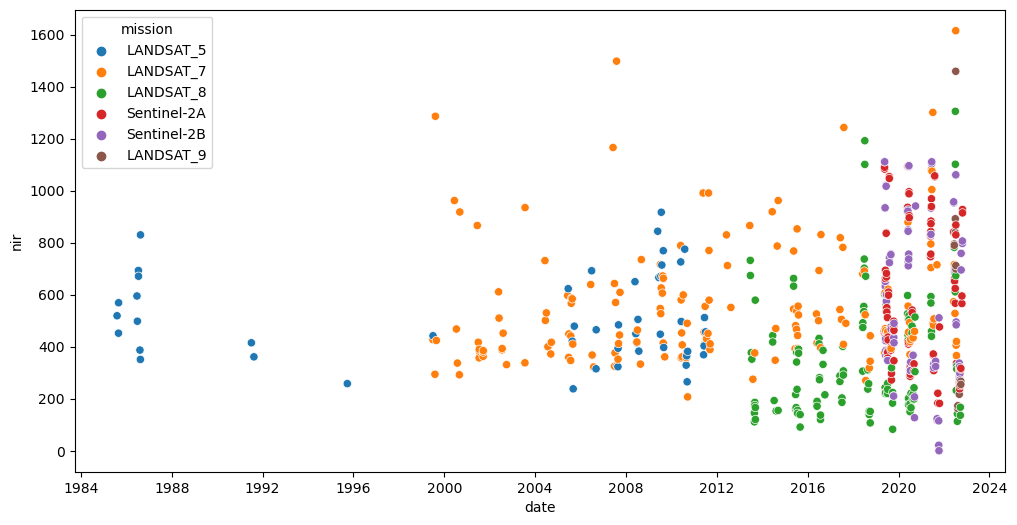

In [4]:
plt.figure(figsize = (12,6))
g = sns.scatterplot(data=df, x='date', y="nir", 
                       legend = 'brief', hue = 'mission')

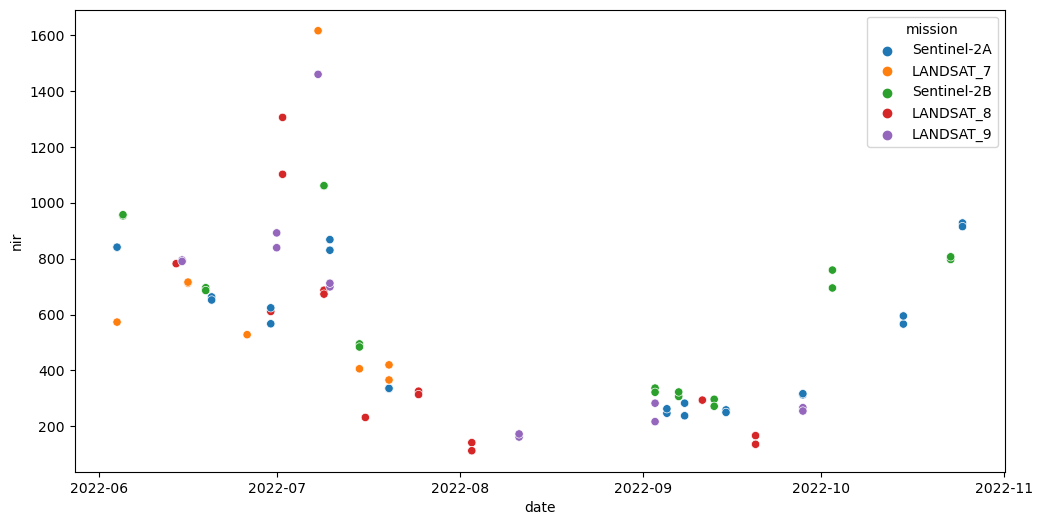

In [5]:
#Filter date to 2022 (OBS timeframe)
sagHLS = df[df['date'] > '2022-01-01']

plt.figure(figsize = (12,6))
g = sns.scatterplot(data=sagHLS, x='date', y="nir", 
                       legend = 'brief', hue = 'mission')

In [6]:
#Read in OBS5 data
obs5 = pd.read_csv(r'sagGaugeData/obs5_obs4.csv', header = 0, index_col = 0,
                         parse_dates=True, infer_datetime_format=True)
obs5['date'] = pd.to_datetime(obs5['date'], format = '%Y-%m-%d')#.dt.strftime('%Y-%m-%d')
#obs5['date'] =obs5['date'].astype(str)
obs5['mission'] = 'OBS TSS'
obs5 = obs5.dropna(subset = ['date', 'timeUTC'])
#obs5 = obs5.dropna(subset='TSS').drop_duplicates('date')

#print(obs5.describe())
print(obs5)

           timestamp       date   timeUTC   R0_V_sd        NTU     NTU_sd  \
7.0     1.654457e+09 2022-06-05  19:26:32  0.003871  45.525305 -42.323456   
6.0     1.654454e+09 2022-06-05  18:26:32  0.003932  46.588265 -42.289293   
8.0     1.654461e+09 2022-06-05  20:26:32  0.003560  46.885894 -42.496897   
5.0     1.654450e+09 2022-06-05  17:26:32  0.003849  47.821299 -42.335554   
9.0     1.654464e+09 2022-06-05  21:26:32  0.003933  48.331520 -42.288769   
...              ...        ...       ...       ...        ...        ...   
2468.0  1.663411e+09 2022-09-17  10:38:17  0.000308  24.473563 -37.553279   
2469.0  1.663415e+09 2022-09-17  11:38:17  0.000273  24.520133 -37.563949   
2470.0  1.663418e+09 2022-09-17  12:38:17       NaN        NaN        NaN   
2471.0  1.663422e+09 2022-09-17  13:38:17  0.000159   3.610247 -37.598762   
2472.0  1.663425e+09 2022-09-17  14:38:17  0.000191   3.610247 -37.588956   

           level        TSS   TSS_ci_1    TSS_ci_2    doy  mission  
7.0   

Text(0, 0.5, 'TSS (mg/L)')

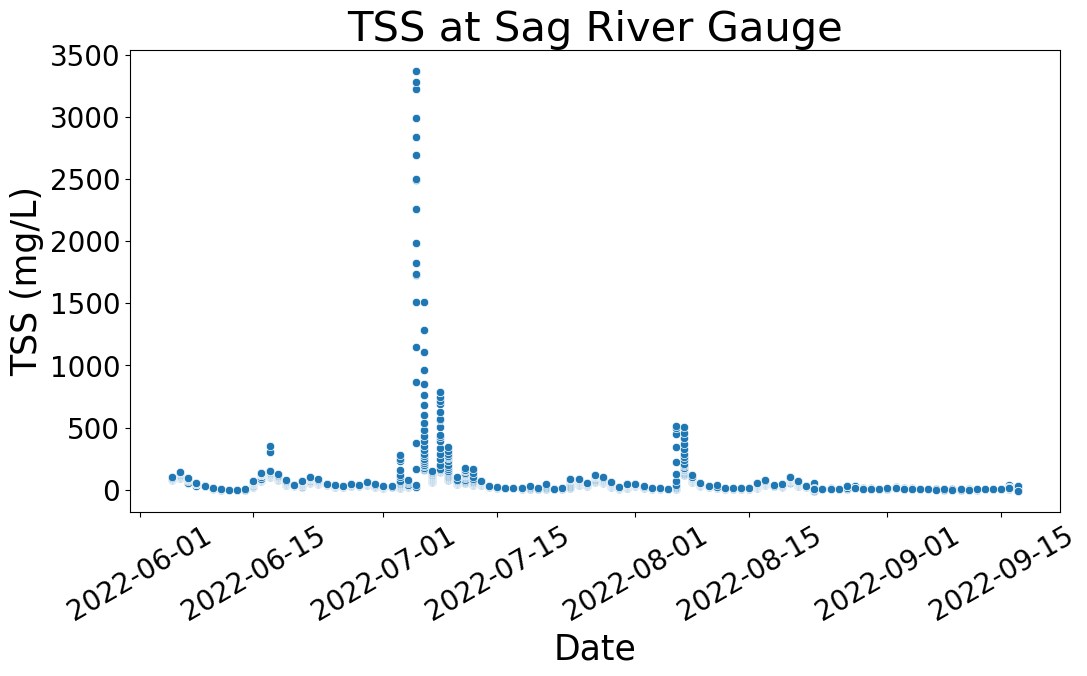

In [7]:
plt.figure(figsize = (12,6))
g = sns.scatterplot(data=obs5, x="date", y="TSS", 
                       legend = 'brief')
plt.xticks(label = 'Date', fontsize = 20, rotation=30)
plt.title(label = 'TSS at Sag River Gauge', fontsize = 30)
plt.yticks(label = 'TSS (mg/L)', fontsize = 20)
plt.xlabel('Date',fontsize=25)
plt.ylabel('TSS (mg/L)',fontsize=25)

                            OLS Regression Results                            
Dep. Variable:                    TSS   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.406e+06
Date:                Fri, 03 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:35:53   Log-Likelihood:                -6415.2
No. Observations:                1940   AIC:                         1.283e+04
Df Residuals:                    1938   BIC:                         1.285e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5889      0.157    -10.104      0.0

Text(0, 0.5, 'TSS (log)')

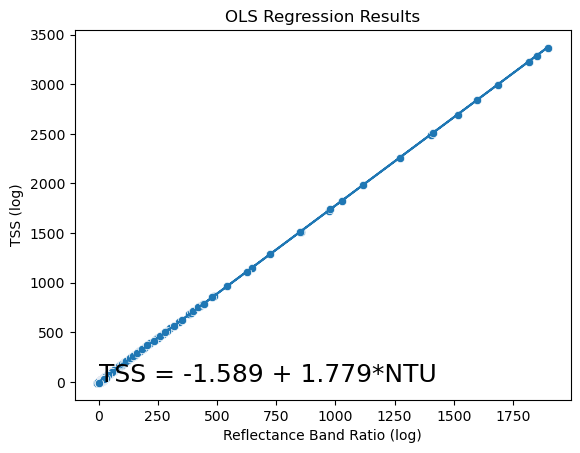

In [8]:
import statsmodels.api as sm

#df = #hls_obs[hls_obs['tss'] < 200]
#hlsFusion#[hlsFusion['tss'] < 200] #aquaFusion[aquaFusion['SiteID'] == 'INSTOR_WQX-2321']#'USGS-03086000',INSTOR_WQX-2221 #'USGS-03049625'
#df = hlsFusion[hlsFusion['Matchup'] == 'Fusion']
df = obs5.dropna(subset = 'NTU')

#define predictor and response variables
y = df['TSS']
x = df['NTU']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

import matplotlib.pyplot as plt

#find line of best fit
a, b = np.polyfit(df['NTU'], df['TSS'], 1)

#add points to plotå
plot = sns.scatterplot(data = df, x = df['NTU'], y = df['TSS'])

#add line of best fit to plot
plt.plot(df['NTU'], a*df['NTU']+b)

#add fitted regression equation to plot
plt.text(2, 1, 'TSS = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + '*NTU', size=18)
# plt.text(5, 4.4, 'R2 = 0.388', size=18)

#add axis label
plt.title('OLS Regression Results')
plt.xlabel('Reflectance Band Ratio (log)')
plt.ylabel('TSS (log)')

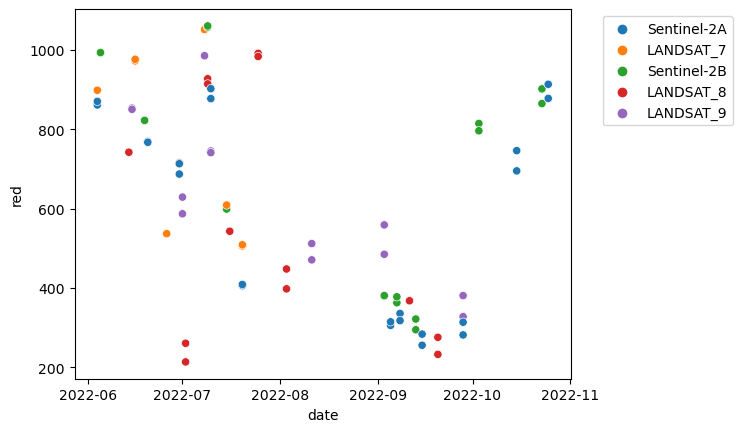

In [9]:
plot = sns.scatterplot(data=sagHLS, x="date", y="red", 
                       legend = 'brief', hue="mission")
plt.legend(fontsize='6')

sns.move_legend(plot, "upper left", bbox_to_anchor=(1.05, 1))
#plot.set(title='Additional Huc5Fine Image TSS vs Red Reflectance')

In [10]:
sagHLS = sagHLS.sort_values(by=["date", "mission"], ascending=False)
sagHLS = sagHLS.drop_duplicates('date')
sagHLS

,date,sceneID,mission,blue,green,red,nir,swir1,swir2,qa,...,swir2_sd,qa_sd,dswe_sd,hillshade,hillshadow,hillshadow_sd,azimuth,zenith,pixelCount,elevation
SiteID,,,,,,,,,,,,,,,,,,,,,
Sag_Gauge,2022-10-25,L2A_T05WPS_A038350_20221025T215606,Sentinel-2A,1183.0,1018.0,877.5,927.5,602.5,737.0,0.0,...,65.000000,0.000000,0.000000,252.0,1.0,0.0,183.886739,81.253109,2,342
Sag_Gauge,2022-10-23,L2A_T05WPS_A029413_20221023T220554,Sentinel-2B,1298.0,1053.5,864.5,797.0,691.5,652.0,0.0,...,122.907231,0.000000,0.000000,251.0,1.0,0.0,186.302685,80.641934,4,342
Sag_Gauge,2022-10-15,L2A_T05WPS_A038207_20221015T215532,Sentinel-2A,828.0,829.0,695.0,566.0,363.0,396.0,0.0,...,211.642718,0.000000,0.000000,249.0,1.0,0.0,183.563743,77.680140,5,342
Sag_Gauge,2022-10-03,L2A_T05WPS_A029127_20221003T220528,Sentinel-2B,928.5,986.5,814.5,759.0,548.5,582.5,0.0,...,166.554336,0.000000,0.000000,243.0,1.0,0.0,185.402783,73.192041,14,342
Sag_Gauge,2022-09-28,L2A_T05WPS_A037964_20220928T220537,Sentinel-2A,181.0,339.0,314.0,313.0,118.0,103.0,0.0,...,214.004873,0.000000,0.160073,241.0,1.0,0.0,185.087286,71.243016,37,342
Sag_Gauge,2022-09-20,LC80720112022263LGN00,LANDSAT_8,193.0,372.0,276.0,167.0,192.0,145.0,21952.0,...,118.242701,0.000000,0.333710,92.0,1.0,0.0,177.459919,21.208973,43,342
Sag_Gauge,2022-09-15,L2A_T05WPS_A037778_20220915T215538,Sentinel-2A,190.0,361.0,256.0,259.0,29.0,48.0,0.0,...,139.174239,0.000000,0.000000,233.0,1.0,0.0,181.310331,66.118347,41,342
Sag_Gauge,2022-09-13,L2A_T05WPS_A028841_20220913T220532,Sentinel-2B,274.0,407.0,322.0,297.0,80.0,66.0,0.0,...,134.953783,0.000000,0.000000,232.0,1.0,0.0,183.823635,65.389495,42,342
Sag_Gauge,2022-09-11,LC80730122022254LGN00,LANDSAT_8,209.0,473.0,368.0,294.0,325.0,315.0,21952.0,...,41.529106,0.000000,0.000000,112.0,1.0,0.0,174.713615,25.938917,3,342


Text(49.84194444444444, 0.5, 'Reflectance and TSS (mg/L)')

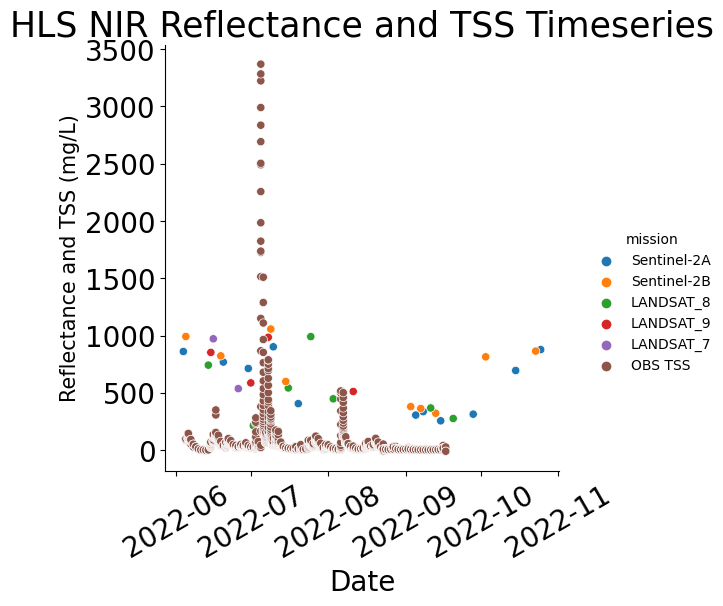

In [11]:
sagHLS['plot_data'] = sagHLS['red']
obs5['plot_data'] = obs5['TSS']

df = pd.concat([sagHLS, obs5], ignore_index=True)


g = sns.relplot(data=df, x='date', y='plot_data', hue='mission', marker = 'o')

plt.xticks(label = 'Date', fontsize = 20, rotation=30)
plt.title(label = 'HLS NIR Reflectance and TSS Timeseries', fontsize = 25)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Reflectance and TSS (mg/L)',fontsize=15)
#plt.show()


<Figure size 1400x800 with 0 Axes>

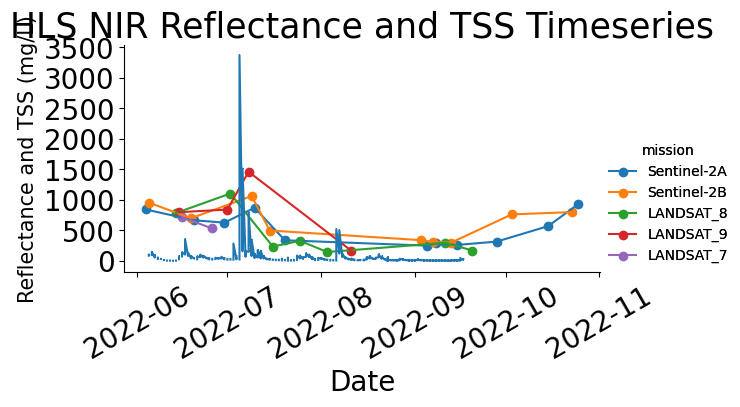

In [12]:
#Combined figure.
plt.figure(figsize = (14,8))

fg = sns.FacetGrid(data=sagHLS, hue='mission', aspect=1.5) #, hue='mission'
fg.map(plt.scatter, 'date', 'nir').add_legend()
fg.map(plt.plot, 'date', 'nir').add_legend()
fg.axes[0,0].plot(obs5.date, obs5['TSS'], marker=",")
plt.xticks(label = 'Date', fontsize = 20, rotation=30)
plt.title(label = 'HLS NIR Reflectance and TSS Timeseries', fontsize = 25)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Reflectance and TSS (mg/L)',fontsize=15)
plt.show()

In [13]:
print(sagHLS.columns.values.tolist())
print(obs5.columns.values.tolist())

['date', 'sceneID', 'mission', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'qa', 'dswe', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'qa_sd', 'dswe_sd', 'hillshade', 'hillshadow', 'hillshadow_sd', 'azimuth', 'zenith', 'pixelCount', 'elevation', 'plot_data']
['timestamp', 'date', 'timeUTC', 'R0_V_sd', 'NTU', 'NTU_sd', 'level', 'TSS', 'TSS_ci_1', 'TSS_ci_2', 'doy', 'mission', 'plot_data']


In [14]:
#Matchup OBS to Landsat/Sentinel Data

#Add time acquisition to HLS data. Landsat acquisition time is about 21:30:00 (UTC), Sentinel is between 21:46:00 and 22:06:00. I will say it is 21:30 for these purposes to best fit OBS times
sagHLS['timeUTC'] = '21:30:00'

sagHLS['datetime'] = sagHLS['date'].astype(str) + ' ' + sagHLS['timeUTC'].astype(str)

sagHLSMerge = sagHLS.loc[:, ['date', 'sceneID', 'mission', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'pixelCount', 'elevation', 'datetime']]

#sagHLSMerge [['SiteID','sceneID', 'mission', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'pixelCount', 'elevation', 'datetime']]

obs5['SiteID'] = 'Sag_Gauge'
obs5['datetime'] = obs5['date'].astype(str) + ' ' + obs5['timeUTC'].astype(str)

obs5Merge = obs5.loc[:, ['NTU', 'NTU_sd', 'level', 'TSS', 'TSS_ci_1', 'TSS_ci_2', 'doy', 'SiteID', 'datetime']]

#convert to datetime objects
sagHLSMerge['datetime'] = pd.to_datetime(sagHLS['datetime'], utc=True, errors='coerce')
obs5Merge['datetime'] = pd.to_datetime(obs5['datetime'], utc=True, errors='coerce')

#sort into chronological order
sagHLSMerge = sagHLSMerge.sort_values(by = 'datetime')
obs5Merge = obs5Merge.sort_values(by = 'datetime')

#perform merge
hls_obs = pd.merge_asof(obs5Merge, sagHLSMerge, on = 'datetime', by ='SiteID',
                                 tolerance=pd.Timedelta(12, "h"),
                                 allow_exact_matches=True).dropna(subset = ['TSS', 'red']).drop_duplicates(['date'])
#to csv
hls_obs.to_csv(r'hls_obs.csv')

print(hls_obs[['TSS', 'datetime', 'date','red', 'nir']])
print(hls_obs.shape[0])

             TSS                  datetime       date     red     nir
10     91.875018 2022-06-05 22:26:32+00:00 2022-06-05   992.0   953.0
214    22.768317 2022-06-15 00:26:32+00:00 2022-06-14   742.0   782.0
236    68.638267 2022-06-15 22:26:32+00:00 2022-06-15   853.0   795.0
260   129.747905 2022-06-16 22:26:32+00:00 2022-06-16   972.0   712.0
332    38.762444 2022-06-19 22:26:32+00:00 2022-06-19   823.0   696.0
356    39.818660 2022-06-20 22:26:32+00:00 2022-06-20   769.0   663.0
500    30.237273 2022-06-26 22:26:32+00:00 2022-06-26   537.0   528.0
596    20.806773 2022-06-30 22:26:32+00:00 2022-06-30   713.0   624.0
620    27.747621 2022-07-01 22:26:32+00:00 2022-07-01   587.0   839.0
644    18.694341 2022-07-02 22:26:32+00:00 2022-07-02   214.0  1101.5
788   441.105282 2022-07-08 22:26:32+00:00 2022-07-08   985.0  1459.0
812    80.407531 2022-07-09 22:26:32+00:00 2022-07-09  1057.0  1060.0
836    75.428227 2022-07-10 22:26:32+00:00 2022-07-10   902.0   868.0
956    17.789013 202

<AxesSubplot: xlabel='datetime', ylabel='red'>

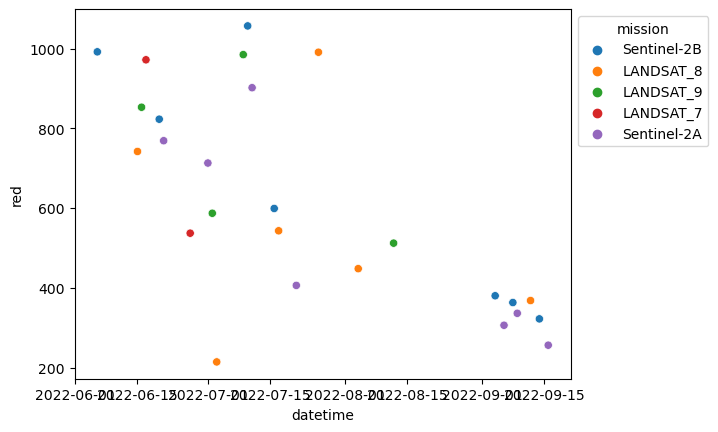

In [15]:
#Generate Plot
plot = sns.scatterplot(data=hls_obs, x="datetime", y="red", hue="mission")
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plot

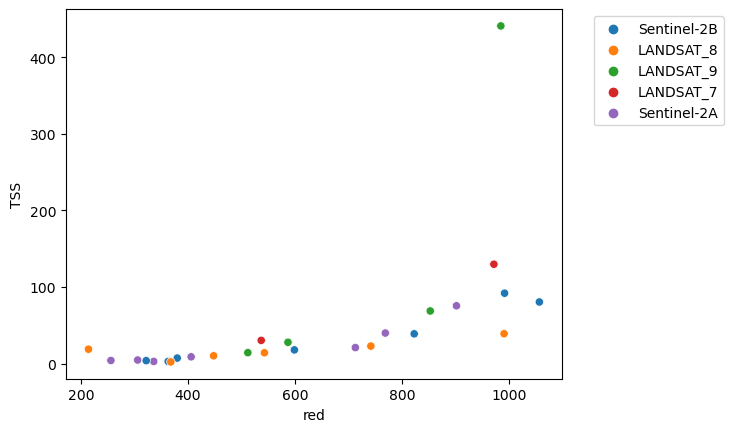

In [16]:
plot = sns.scatterplot(data=hls_obs, x="red", y="TSS", 
                       legend = 'brief', hue="mission")
plt.legend(fontsize='6')

sns.move_legend(plot, "upper left", bbox_to_anchor=(1.05, 1))
#plot.set(title='Additional Huc5Fine Image TSS vs Red Reflectance')

In [17]:
hls_obs.date

10     2022-06-05
214    2022-06-14
236    2022-06-15
260    2022-06-16
332    2022-06-19
356    2022-06-20
500    2022-06-26
596    2022-06-30
620    2022-07-01
644    2022-07-02
788    2022-07-08
812    2022-07-09
836    2022-07-10
956    2022-07-15
980    2022-07-16
1076   2022-07-20
1196   2022-07-25
1412   2022-08-03
1604   2022-08-11
2149   2022-09-03
2195   2022-09-05
2242   2022-09-07
2264   2022-09-08
2335   2022-09-11
2383   2022-09-13
2430   2022-09-15
Name: date, dtype: datetime64[ns]

Text(30.922356091030778, 0.5, 'Reflectance and TSS (mg/L)')

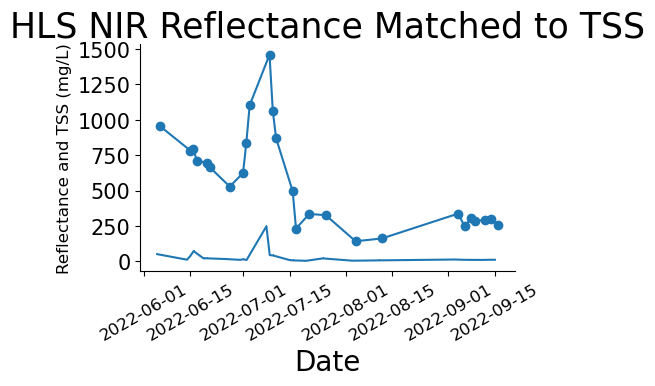

In [18]:
fg = sns.FacetGrid(data=hls_obs, aspect=1.5) #, hue='mission'
fg.map(plt.scatter, 'datetime', 'nir').add_legend()
fg.map(plt.plot, 'datetime', 'nir').add_legend()
#fg.map(plt.plot, 'datetime', 'red').add_legend()
#fg.map(plt.plot, 'datetime', 'blue').add_legend()
#fg.map(plt.plot, 'datetime', 'green').add_legend()
fg.axes[0,0].plot(hls_obs.date, hls_obs['NTU'], marker=",")

#fg.axes[0,0].plot(obs5.date, obs5['TSS'], marker=",")

plt.xticks(fontsize = 12, rotation=30)
plt.title(label = 'HLS NIR Reflectance Matched to TSS', fontsize = 25)
plt.yticks(fontsize = 15)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Reflectance and TSS (mg/L)',fontsize=12)



# Models and Fluxes Figure

In [19]:
#bring in Sag Gauge HLS data for summer/Fall 2022
fluxes = pd.read_csv(r'sagGaugeData/model_obs45_sed_2022.csv', header = 0, index_col = 0,
                         parse_dates=True, infer_datetime_format=True)
fluxes['date_hourly'] = pd.to_datetime(fluxes['date_hourly'], format = '%Y-%m-%d')

fluxes['time'] = pd.to_datetime(fluxes['time'], format = '%Y-%m-%d %H:%M')

fluxes.head()

,time,Q,quality,Qs,SSC,SSC_mg,year,dt,Qsum,pred,date_hourly,Q_hourly,TSS_obs,Qtss_obs,TSS_hourly_g,TSS_hourly_mg,Qtss_wbm_hourly
409260,2022-06-05 00:00:00,146.681265,A,56.991535,0.388540,388.539971,2022,900,86692297.68,0.063664,2022-06-05,148.663445,99.268530,14.757602,0.393657,393.656793,58.526308
409261,2022-06-05 00:15:00,148.946613,A,58.742758,0.394388,394.388009,2022,900,86826349.63,0.063611,2022-06-05,150.999584,89.762587,13.554113,0.399686,399.685746,60.353662
409262,2022-06-05 00:30:00,148.946613,A,58.742758,0.394388,394.388009,2022,900,86960401.59,0.063611,2022-06-05,154.043645,87.951931,13.548436,0.407538,407.537889,62.779242
409263,2022-06-05 00:45:00,150.079287,A,59.628179,0.397311,397.311184,2022,900,87095472.94,0.063585,2022-06-05,155.813448,91.573242,14.268343,0.412101,412.101014,64.214433
409264,2022-06-05 01:00:00,150.079287,A,59.628179,0.397311,397.311184,2022,900,87230544.30,0.063585,2022-06-05,157.724836,86.443051,13.634216,0.417028,417.028081,65.777959


In [20]:
# fluxes.Qtss_obs = fluxes.Qtss_obs / 1000
# fluxes.Qtss_wbm_hourly = fluxes.Qtss_wbm_hourly / 1000
# fluxes.Q_hourly = fluxes.Q_hourly / 1000

Text(31.06636964524766, 0.5, 'Reflectance and TSS (mg/L)')

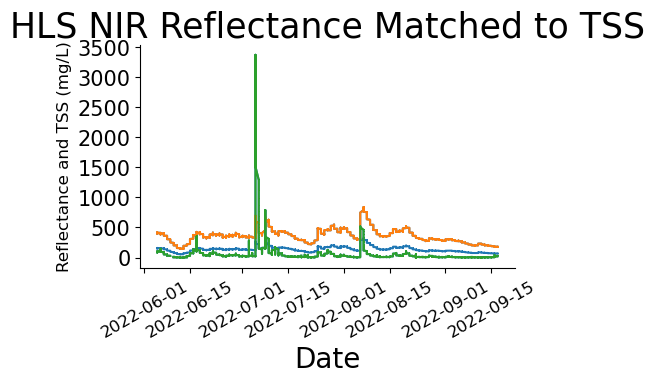

In [21]:
fg = sns.FacetGrid(data=fluxes, aspect=1.5) #, hue='mission'
#fg.map(plt.scatter, 'date_hourly', 'TSS_obs').add_legend()
fg.map(plt.plot, 'date_hourly', 'TSS_hourly_mg').add_legend()
fg.map(plt.plot, 'date_hourly', 'TSS_obs').add_legend()
#fg.map(plt.plot, 'date_hourly', 'Q_hourly').add_legend()
#fg.map(plt.plot, 'datetime', 'green').add_legend()
fg.axes[0,0].plot(fluxes.date_hourly, fluxes['Q_hourly'], marker=",")
fg.axes[0,0].plot(fluxes.date_hourly, fluxes['TSS_hourly_mg'], marker=",")

fg.axes[0,0].plot(fluxes.date_hourly, fluxes['TSS_obs'], marker=",")

plt.xticks(fontsize = 12, rotation=30)
plt.title(label = 'HLS NIR Reflectance Matched to TSS', fontsize = 25)
plt.yticks(fontsize = 15)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Reflectance and TSS (mg/L)',fontsize=12)

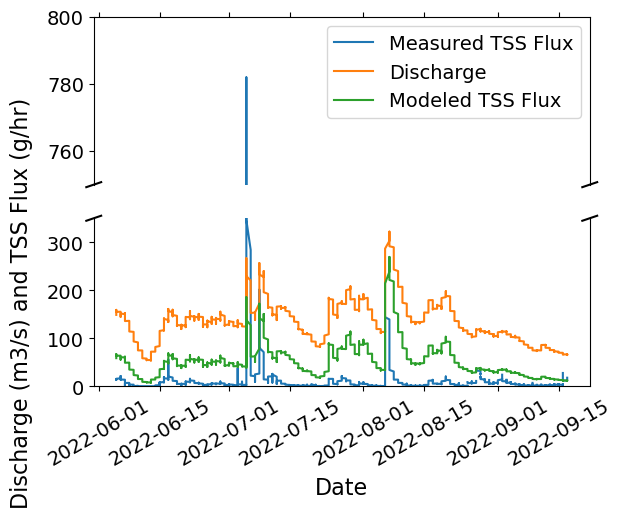

In [22]:
import matplotlib.pyplot as plt
import numpy as np


# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# plot the same data on both axes
#ax.plot(fluxes.date_hourly, fluxes.TSS_obs, label = 'in situ TSS')
ax.plot(fluxes.date_hourly, fluxes.Qtss_obs, label = 'Measured TSS Flux')

#ax2.plot(fluxes.date_hourly, fluxes.TSS_obs, label = 'in situ TSS')
ax2.plot(fluxes.date_hourly, fluxes.Qtss_obs, label = 'Measured TSS Flux')
ax2.plot(fluxes.date_hourly, fluxes.Q_hourly, label = 'Discharge')
#ax2.plot(fluxes.date_hourly, fluxes.TSS_hourly_mg, label = 'Modeled TSS')
ax2.plot(fluxes.date_hourly, fluxes.Qtss_wbm_hourly, label = 'Modeled TSS Flux')

# zoom-in / limit the view to different portions of the data
ax.set_ylim(750, 800)  # outliers only
ax2.set_ylim(0, 350)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False, labelsize = 14)  # don't put tick labels at the top
ax2.tick_params(axis='x', rotation=30, labelsize = 14)
ax2.xaxis.tick_bottom()
ax2.legend(bbox_to_anchor=(0.45, 0., 0.1, 2.2), fontsize = 14) #loc='upper right'
#plt.xticks(fontsize = 14, rotation=30)
plt.yticks(fontsize = 14)
plt.xlabel('Date',fontsize=16, labelpad=5)
plt.ylabel('Discharge (m3/s) and TSS Flux (g/hr)',fontsize=16, labelpad=10)

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

plt.show()